<a href="https://colab.research.google.com/github/Oksana-Pettske/Neuralnet/blob/main/1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
#импорты
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

#сброс
tf.keras.backend.clear_session()

#загрузка выборок в модель
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#нормировка
x_train = x_train / 255.0
x_test = x_test / 255.0

#формирование модели
model = keras.Sequential ([
                           #слой, преобразующий 28*28 в вектор 784
                           Flatten(input_shape = (28, 28, 1)),
                           #слой со 128 нейронами
                           Dense(128, activation = 'relu'),
                           #выходной слой с 10 нейронами
                           Dense(10, activation = 'softmax')
])

#y_train, y_test в формате вектора
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

#функция потерь и функция оптимизации
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

#обучение модели
history = model.fit(x_train,
          y_train_cat, 
          batch_size = 32, 
          epochs = 10, 
          validation_split = 0.2)

Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2863 - accuracy: 0.9180 - val_loss: 0.1570 - val_accuracy: 0.9559
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1277 - accuracy: 0.9624 - val_loss: 0.1146 - val_accuracy: 0.9681
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0876 - accuracy: 0.9742 - val_loss: 0.0936 - val_accuracy: 0.9715
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0642 - accuracy: 0.9815 - val_loss: 0.0940 - val_accuracy: 0.9720
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0499 - accuracy: 0.9846 - val_loss: 0.0894 - val_accuracy: 0.9748
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0395 - accuracy: 0.9884 - val_loss: 0.0841 - val_accuracy: 0.9744
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0297 - accuracy: 0.9911 - val_loss: 0.0850 - val_accuracy:

In [42]:
#оценка модели на тестовых данных
model.evaluate(x_test, y_test_cat)

313/313 [==============================] - 1s 3ms/step - loss: 0.0824 - accuracy: 0.9775


[0.08237260580062866, 0.9775000214576721]

It is probably: 4

Image:


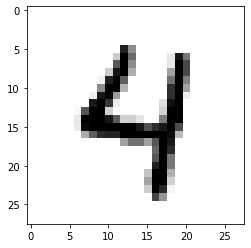

In [45]:
# распознавание тестового изображения
n = 27
x = np.expand_dims(x_test[n], axis=0)
res = model.predict(x)
print('It is probably: ' + str(np.argmax(res)))
print('\nImage:')
plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show()


It is probably: 7
Image:


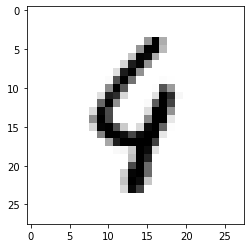


It is probably: 2
Image:


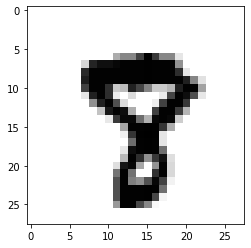


It is probably: 1
Image:


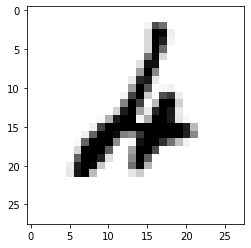


It is probably: 0
Image:


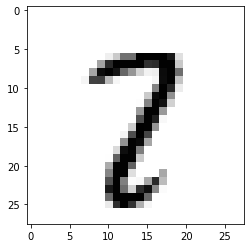


It is probably: 4
Image:


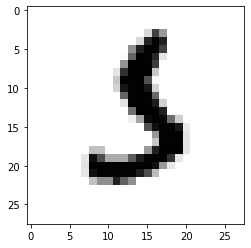


It is probably: 1
Image:


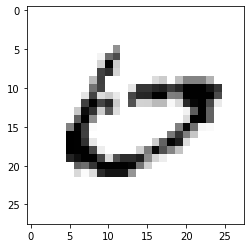


It is probably: 4
Image:


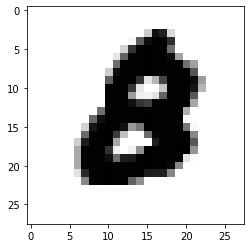


It is probably: 9
Image:


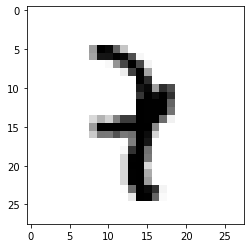


It is probably: 5
Image:


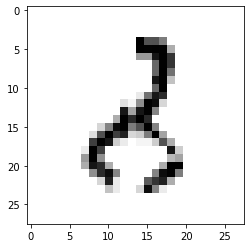


It is probably: 9
Image:


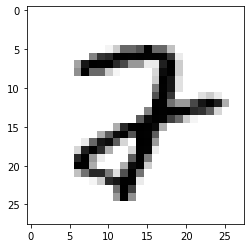

In [61]:
#вывод первых 10 неверных распознаваний
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)

mask = pred == y_test

x_false = x_test[~mask]
y_false = x_test[~mask]

for i in range(10):
    print("\nIt is probably: " + str(y_test[i]))
    print('Image:')
    plt.imshow(x_false[i], cmap=plt.cm.binary)
    plt.show()